# Trabalho de Integração Numérica

**Luan Glasser**

**Disciplina de Satélites Artificiais - Movimento Orbital**

**Professor Hélio Kuga**

**11/08/2021**


In [37]:
# Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Problema 1

Escreva as equações para integração numérica de equações diferenciais ordinárias (EDOs) via Runge-Kutta de ordem 2, 3, e 4, e cite a Referência Bibliográfica utilizada. Prepare as rotinas de computador correspondentes, com os seguintes requisitos:

* em qualquer linguagem de programação (por exemplo MatLab, MathCad, Mathematica, Python, C, Fortran, etc.);
* na forma vetorial de maneira a permitir a solução de problemas de EDOS de primeira ordem com n = 1, 2, 3, ... dimensões (n é a quantidade de EDOs).


-----

Seguindo o que é apresentado em Kuga (2021) e Franco (2006), o problema tratado neste exercício é o da solução de uma equação diferencial ordinária (EDO), da forma:

\begin{equation}
\dot{x}(t) = f(t, x(t)),
\end{equation}

Nessa equação, $x(t)$ é uma função do tempo, $f$ é uma função de $x$ e $t$. Oponto sobre $x$ equivale ao operador derivada com relação a $t$, ou seja, $d/dt$. Usualmente, como o contexto deste trabalho é mecânica celeste, $t$ será o tempo, mas isso não é necessário. A solução desse tipo de equação consiste em se encontrar uma função $x(t)$, diferenciável em $t$, pertencente ao conjunto [$a$, $b$], tal que $\dot{x}(t) = f(t, x(t))$. Neste problema, as soluções serão encontradas por meio de métodos numéricos do tipo Runge-Kutta (RK). 

A programação feita dos integradores neste trabalho seguirá, aproximadamente, o seguinte procedimento: (1) escrever uma função para a EDO; (2) escrever uma função de passo de integração para calcular o próximo valor da EDO de acordo com algum método numérico; (3) escrever uma função que recebe (1) e (2) e que calcula todos os passos de integração em determinado intervalo de tempo. Como observação: a função elaborada em (1) lidará com a dinâmica do sistema externamente às demais funções, tal que aceitará tanto equações na forma vetorial quanto na forma escalar.

A formulação geral do RK de $R$ estágios é dada por:

\begin{equation}
\begin{split}
k_1 &= f(t_n, x_n), \\
k_r &= f \left( t_n + a_r h, x_n + h \sum_{s = 1}^{r - 1} b_{rs} k_s \right); \: r = 2, 3, .., R\\
\phi(t_n, x_n, h) &= \sum_{r = 1}^{R} c_r k_r,\\
a_r &= \sum_{s = 1}^{r - 1} b_{rs}; \: r = 2, 3, .., R \\
x_{n+1} &= x_n + h \phi(t_n, x_n, h).
\end{split}
\end{equation}

Os coeficientes $c_r$, $a_r$ e $b_{rs}$ podem ser determinados por comparação entre a expansão de $\phi$ em séries de potência e Taylor. A ordem do método terá relação com o truncamento feito nessas séries comparadas. Por exemplo: truncar as séries nos termos de ordem 2 gera um Runge-Kutta de ordem 2. Dependendo do valor de $R$, diferentes ordens de RK podem ser obtidas. O método de Runge-Kutta de 2a ordem é descrito por:

\begin{equation}
\begin{split}
k_1 &= f(t_n, x_n),\\
k_2 &= f(t_n + h, x_n + h k_1),\\
x_{n+1} &= x_n + \frac{h}{2} (k_1 + k_2).
\end{split}
\end{equation}

Nesse método, dada uma condição inicial $t_n$ e $x_n$, a ideia é que $k_1$ e $k_2$ são calculados ($n$ é o passo atual - neste caso, o inicial, que vale zero). Com esses valores, o próximo valor de $x$, $x_{n+1}$, é determinado. O próximo instante de tempo, $t_{n+1}$, é calculado somando-se $t_n + h$, em que $h$ é chamado de passo de integração. Esse processo vale um passo da integração numérica. O próximo passo acontece ao se atribuir a ($t_n$, $x_n$) os valores recém calculados ($t_{n+1}$, $x_{n+1}$) e então reiniciar o ciclo de integração. Este processo vai se repetir para os demais RK e, de maneira similar, mas com mais estados, para o Adams-Bashforth-Moulton (ABM).

Abaixo serão implementadas algumas funções para que o trabalho numérico seja realizado. Primeiramente, uma equação de teste é construída para alimentar os integradores numéricos e rodá-los. Esta equação é dada por:

\begin{equation}
\dot{x}(t) = t x(t).
\end{equation}

In [38]:
# Função com equação de teste para integração.
def eq(t, x):
    '''
    Função de teste para solucionadores de EDOs.
    A solução desta equação deve resultar:
        x(0) = 1
        x(1) = e^(1/2) = 1.64872
        x(2) = e = 2.72
    '''
    dxdt = t*x
    return dxdt

A função abaixo contém em si o código de um passo do RK2. Executar esta função diversas vezes consecutivas sobre uma equação diferencial retornará os resultados numéricos da integração.

In [39]:
# Função do Runge-Kutta 2
def rk2(eq, t, x, h):
    '''
    Esta função executa 1 passo do Runge-Kutta de 2a ordem
    ---
    Entradas: 
        eq - função com a equação a ser resolvida, deve seguir o formato eq(t, x);
        t - tempo atual de integração; 
        x - estado atual; 
        h - passo de integração.
    Retorna o próxio estado integrado.
    '''
    k1 = eq(t, x)
    k2 = eq(t + h, x + h*k1)
    x = x + (h/2)*(k1 + k2)
    return x

A próxima função serve para executar passos de integração de acordo com diferentes métodos e foi pensada para tornar os códigos construídos neste trabalho intercambiáveis.

In [40]:
# Função integradora
def integrador(eq, metodo, t0, tf, x0, h):
    '''
    Esta função executa um método integrador sobre uma equação 
    em um intervalo de tempo a partir de um estado inicial.
    ---
    Entradas:
        eq - função com a equação a ser resolvida, deve seguir o formato eq(t, x);
        metodo - função com o metodo de integração;
        t - tempo atual de integração; 
        x - estado inicial; 
        h - passo de integração.

    '''
    # Listas para armazenar os resultados
    t_arr = []
    x_arr = []

    # Valor inicial de t
    t = t0
    x = x0

    # Armazenar os valores iniciais de t e x
    t_arr.append(t)  
    x_arr.append(x) 

    # Laço para executar os passos de integração
    #for i in np.arange(t0, tf, h):
    while t < tf:

        # Calcular o próximo passo
        x = metodo(eq, t, x, h) 

        # Atualizar t
        t += h # calcula o próximo t

        # Armazenar os valores de t e x
        t_arr.append(t) 
        x_arr.append(x)

    return t_arr, x_arr

A seguir, o integrador numérico, usando passos de integração do RK2, para a equação teste, é executado.

Text(0.5, 1.0, 'Resultado do RK2')

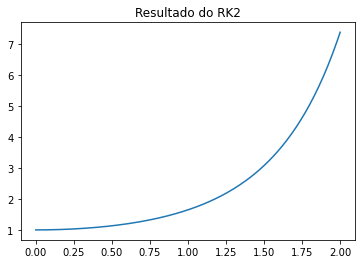

In [41]:
# Aplicando o Runge-Kutta de 2a ordem na equação teste
t_arr, x_arr = integrador(eq = eq, metodo = rk2, t0 = 0., tf = 2., x0 = 1., h = 0.01)

# Plot simples
plt.plot(t_arr, x_arr)
plt.title('Resultado do RK2')

O método de Runge-Kutta de 3a ordem (RK3) é descrito por:

\begin{equation}
\begin{split}
k_1 &= f(t_n, x_n),\\
k_2 &= f \left( t_n + \frac{2}{3} h, x_n +  \frac{2}{3} h k_1 \right),\\
k_3 &= f \left( t_n + \frac{2}{3} h, x_n +  \frac{2}{3} h k_2 \right),\\
x_{n+1} &= x_n + \frac{h}{4} \left( k_1 + \frac{3}{2} (k_2 + k_3) \right).
\end{split}
\end{equation}

A implementação do passo de integração do RK3 é feita a seguir.

In [42]:
# Função do Runge-Kutta 3
def rk3(eq, t, x, h):
    '''
    Esta função executa 1 passo do Runge-Kutta de 3a ordem
    ---
    Entradas: 
        eq - função com a equação a ser resolvida, deve seguir o formato eq(t, x);
        t - tempo atual de integração; 
        x - estado atual; 
        h - passo de integração.
    Retorna o próxio estado integrado.
    '''
    k1 = eq(t, x)
    k2 = eq(t + (2/3)*h, x + (2/3)*h*k1)
    k3 = eq(t + (2/3)*h, x + (2/3)*h*k2)
    x = x + (h/4)*(k1 + (3/2)*(k2 + k3))
    return x

Abaixo, a equação de teste com o RK3 é integrada.

Text(0.5, 1.0, 'Resultado do RK3')

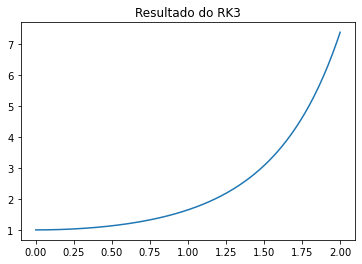

In [43]:
# Aplicando o Runge-Kutta de 3a ordem na equação teste
t_arr, x_arr = integrador(eq = eq, metodo = rk3, t0 = 0., tf = 2., x0 = 1., h = 0.01)

# Plot simples
plt.plot(t_arr, x_arr)
plt.title('Resultado do RK3')

O método de Runge-Kutta de 4a ordem (RK4) é descrito por:

\begin{equation}
\begin{split}
k_1 &= f(t_n, x_n),\\
k_2 &= f \left( t_n + \frac{1}{2} h, x_n +  \frac{1}{2} h k_1 \right),\\
k_3 &= f \left( t_n + \frac{1}{2} h, x_n +  \frac{1}{2} h k_2 \right),\\
k_4 &= f \left( t_n + h, x_n + h k_3 \right),\\
x_{n+1} &= x_n + \frac{h}{6} \left( k_1 + 2 (k_2 + k_3) + k_4 \right).
\end{split}
\end{equation}

A implementação do passo de integração do RK4 é feita a seguir.

In [44]:
# Função do Runge-Kutta 3
def rk4(eq, t, x, h):
    '''
    Esta função executa 1 passo do Runge-Kutta de 3a ordem
    ---
    Entradas: 
        eq - função com a equação a ser resolvida, deve seguir o formato eq(t, x);
        t - tempo atual de integração; 
        x - estado atual; 
        h - passo de integração.
    Retorna o próxio estado integrado.
    '''
    k1 = eq(t, x)
    k2 = eq(t + (1/2)*h, x + (1/2)*h*k1)
    k3 = eq(t + (1/2)*h, x + (1/2)*h*k2)
    k4 = eq(t + h, x + h*k3)
    x = x + (h/6)*(k1 + 2*(k2 + k3) + k4)
    return x

Realizando a integração numérica da equação de teste com o RK4:

Text(0.5, 1.0, 'Resultado do RK4')

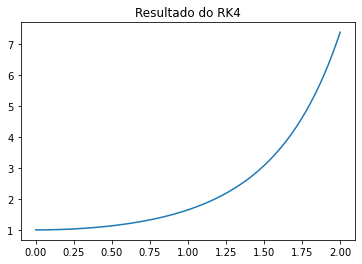

In [45]:
# Aplicando o Runge-Kutta de 4a ordem na equação teste
t_arr, x_arr = integrador(eq = eq, metodo = rk4, t0 = 0., tf = 2., x0 = 1., h = 0.01)

# Plot simples
plt.plot(t_arr, x_arr)
plt.title('Resultado do RK4')

Abaixo, uma classe para os 3 RKs programados é criada, para facilitar o uso dos integradores.

In [46]:
class RungeKutta:
    '''
    Classe RungeKutta
    ---
    Contém Runge-Kuttas de 2a, 3a e 4a ordem.
    '''
        
    # Função do Runge-Kutta 2
    def rk2(self, eq, t, x, h):
        '''
        Esta função executa 1 passo do Runge-Kutta de 2a ordem
        ---
        Entradas: 
            eq - função com a equação a ser resolvida, deve seguir o formato eq(t, x);
            t - tempo atual de integração; 
            x - estado atual; 
            h - passo de integração.
        Retorna o próxio estado integrado.
        '''
        k1 = eq(t, x)
        k2 = eq(t + h, x + h*k1)
        x = x + (h/2)*(k1 + k2)
        return x    

    # Função do Runge-Kutta 3
    def rk3(self, eq, t, x, h):
        '''
        Esta função executa 1 passo do Runge-Kutta de 3a ordem
        ---
        Entradas: 
            eq - função com a equação a ser resolvida, deve seguir o formato eq(t, x);
            t - tempo atual de integração; 
            x - estado atual; 
            h - passo de integração.
        Retorna o próxio estado integrado.
        '''
        k1 = eq(t, x)
        k2 = eq(t + (2/3)*h, x + (2/3)*h*k1)
        k3 = eq(t + (2/3)*h, x + (2/3)*h*k2)
        x = x + (h/4)*(k1 + (3/2)*(k2 + k3))
        return x
    
    # Função do Runge-Kutta 3
    def rk4(self, eq, t, x, h):
        '''
        Esta função executa 1 passo do Runge-Kutta de 3a ordem
        ---
        Entradas: 
            eq - função com a equação a ser resolvida, deve seguir o formato eq(t, x);
            t - tempo atual de integração; 
            x - estado atual; 
            h - passo de integração.
        Retorna o próxio estado integrado.
        '''
        k1 = eq(t, x)
        k2 = eq(t + (1/2)*h, x + (1/2)*h*k1)
        k3 = eq(t + (1/2)*h, x + (1/2)*h*k2)
        k4 = eq(t + h, x + h*k3)
        x = x + (h/6)*(k1 + 2*(k2 + k3) + k4)
        return x

    # Função integradora
    def integrador(self, eq, metodo, t0, tf, x0, h):
        '''
        Esta função executa um método integrador sobre uma equação 
        em um intervalo de tempo a partir de um estado inicial.
        ---
        Entradas:
            eq - função com a equação a ser resolvida, deve seguir o formato eq(t, x);
            metodo - função com o metodo de integração;
            t - tempo atual de integração; 
            x - estado inicial; 
            h - passo de integração.

        '''
        # Listas para armazenar os resultados
        x_arr = []
        t_arr = []

        # Valor inicial de t
        t = t0
        x = x0

        # Armazenar os valores iniciais de t e x
        t_arr.append(t)  
        x_arr.append(x) 

        # Laço para executar os passos de integração
        #for i in np.arange(t0, tf, h):
        while t < tf:

            # Calcular o próximo passo
            x = metodo(eq, t, x, h) 
            
            # Atualizar t
            t += h # calcula o próximo t
            
            # Armazenar os valores de t e x
            x_arr.append(x) 
            t_arr.append(t) 

        return t_arr, x_arr

## Problema 2

Considere a seguinte EDO ($n$ = 1):

\begin{equation}
\frac{dx}{dt} = \frac{e^{-3t} - (3t + 1) x }{t},
\end{equation}

com condição inicial $x(1) = 0$. Obtenha os resultados usando os métodos de Runge-Kutta de ordem 2, ordem 3 e ordem 4, para o intervalo $t$ = [1, 2], e compare com a solução exata, dada nos pontos da tabela abaixo. Descreva claramente qual o passo de integração utilizado e a razão dessa escolha.

|   t   | Solução   exata  |
|:-----:|:----------------:|
| 1,00  |    0,00000000    |
| 1,20  |    0,00455395    |
| 1,40  |    0,00428445    |
| 1,60  |    0,00308616    |
| 1,80  |    0,00200737    |
| 2,00  |    0,00123938    |

------

Para testar os integradores e compará-los, é necessário criar a função com a equação do problema. Isso é feito a seguir.

In [47]:
# Função com equação do problema 2 para teste para integração.
def eq(t, x):
    dxdt = (np.exp(-3*t) - (3*t + 1)*x)/(t)
    return dxdt

Para estudar os resultados dos integradores RK, de 2a a 4a ordem, a seguir eles serão testados com a equação acima e o passo de integração será variado. Incialmente, o passo será de 0.2 e os resultados serão contrapostos com os resultados teóricos. Veja os resultados a seguir.

In [48]:
rk = RungeKutta() # instanciar a classe Runge-Kutta

# Definir parâmetros da integração
h = 0.2
t0 = 1.0
tf = 2.0
x0 = 0.0

# Aplicar os 3 métodos de RK
t_arr, x_arr_rk2 = rk.integrador(eq = eq, metodo = rk.rk2, 
                                 t0 = t0, tf = tf, 
                                 x0 = x0, h = h) # execução com o RK2

_, x_arr_rk3 = rk.integrador(eq = eq, metodo = rk.rk3, 
                             t0 = t0, tf = tf, 
                             x0 = x0, h = h) # execução com o RK3

_, x_arr_rk4 = rk.integrador(eq = eq, metodo = rk.rk4, 
                             t0 = t0, tf = tf, 
                             x0 = x0, h = h) # execução com o RK4

Abaixo, um dataframe de resultados é criado.

In [49]:
# Criando um dataframe para comparação
import pandas as pd
sol = [0.00000000, 0.00455395, 0.00428445, 0.00308616, 0.00200737, 0.00123938, np.nan]
df = pd.DataFrame({'t' : t_arr, 'sol' : sol, 'rk2' : x_arr_rk2, 'rk3' : x_arr_rk3, 'rk4' : x_arr_rk4})

Então uma função de para os plots de comparação é criada e executada.

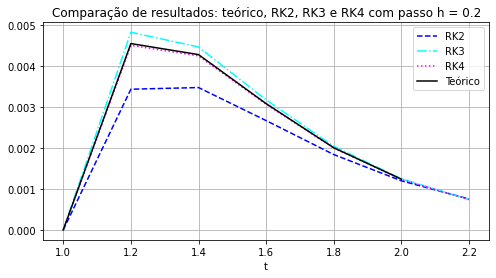

In [50]:
# Função para comparação dos resultados
def plot_comparacao(df, h, sol_teorica = False):
    plt.figure(figsize = (8, 4))
    plt.plot(t_arr, df.rk2, linestyle = '--', color = 'blue')
    plt.plot(t_arr, df.rk3, linestyle = '-.', color = 'cyan')
    plt.plot(t_arr, df.rk4, linestyle = ':', color = 'magenta')
    if sol_teorica: plt.plot(t_arr, df.sol, linestyle = '-', color = 'black')
    plt.grid()
    plt.title('Comparação de resultados: teórico, RK2, RK3 e RK4 com passo h = ' + str(h))
    plt.xlabel('t')
    plt.legend(['RK2', 'RK3', 'RK4', 'Teórico'])

# Comparação dos resultados 
plot_comparacao(df, h, sol_teorica = True)

Desse primeiro gráfico, nota-se que os erros com relação à solução teórica aumentam conforme decresce a ordem do RK, para esse passo de integração. Isto é, o RK4 é mais exato, o RK3 é pouco menos exato e o RK2 é o menos exato, para o passo de 0.2. Passos de integração menores deve retornar melhores soluções para os RKs. Para se estudar isso, a seguir, os passos de integração serão avaliados segundo o conjunto [0,2; 0,1; 0,05; 0,01] e versões semelhantes ao gráfico acima serão plotadas, mas sem os valores teóricos para comparar (por simplicidade no algoritmo). 

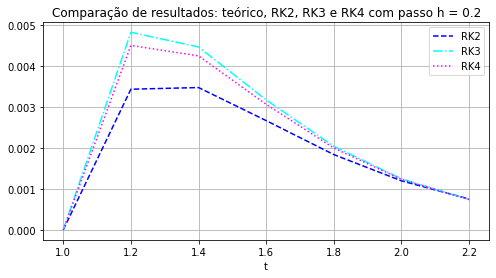

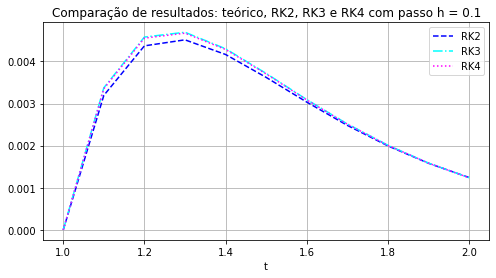

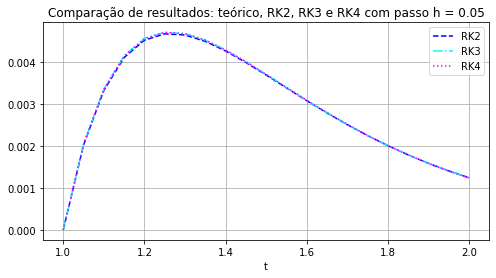

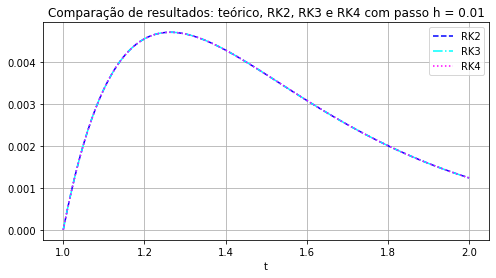

In [51]:
rk = RungeKutta() # instanciar a classe Runge-Kutta

# Definir parâmetros da integração
h_lista = [0.20, 0.10, 0.05, 0.01]
t0 = 1.0
tf = 2.0
x0 = 0.0
df_lista = []
sol = [0.00000000, 0.00455395, 0.00428445, 0.00308616, 0.00200737, 0.00123938]

# Função para pegar pontos do df para comparar com os resultados teóricos
def gerar_tabela_comparacao(df, sol):
    df2 = df.iloc[(df['t'] - 1.0).abs().argsort()[:1]]
    df2 = pd.concat([df2, (df.iloc[(df['t'] - 1.2).abs().argsort()[:1]])])
    df2 = pd.concat([df2, (df.iloc[(df['t'] - 1.4).abs().argsort()[:1]])])
    df2 = pd.concat([df2, (df.iloc[(df['t'] - 1.6).abs().argsort()[:1]])])
    df2 = pd.concat([df2, (df.iloc[(df['t'] - 1.8).abs().argsort()[:1]])])
    df2 = pd.concat([df2, (df.iloc[(df['t'] - 2.0).abs().argsort()[:1]])])
    df2['Solução teórica'] = sol
    return df2

# Laço para gerar gráficos para todos os passos
for h in h_lista:

    # Aplicar os 3 métodos de RK
    t_arr, x_arr_rk2 = rk.integrador(eq = eq, metodo = rk.rk2, 
                                     t0 = t0, tf = tf, 
                                     x0 = x0, h = h) # execução com o RK2

    _, x_arr_rk3 = rk.integrador(eq = eq, metodo = rk.rk3, 
                                 t0 = t0, tf = tf, 
                                 x0 = x0, h = h) # execução com o RK3

    _, x_arr_rk4 = rk.integrador(eq = eq, metodo = rk.rk4, 
                                 t0 = t0, tf = tf, 
                                 x0 = x0, h = h) # execução com o RK4
    
    # Criar dataframe de resultados
    df = pd.DataFrame({'t' : t_arr, 'rk2' : x_arr_rk2, 'rk3' : x_arr_rk3, 'rk4' : x_arr_rk4})

    # Verificar comparação
    plot_comparacao(df, h)
    df_lista.append(gerar_tabela_comparacao(df, sol))

Fica evidente pelos gráficos mostrados que a diminuição do passo de integração faz com que resultados fiquem mais próximos uns dos outros, para todas as ordens de RK. Os gráficos não mostram a exatidão dos resultados, mas que esses ficam mais precisos conforme o passo de integração é diminuído. É notável também que o erro do RK3 para o RK4 é menor que o do RK2 para o RK4, efeito esse que é mitigado com a diminuição do passo de integração.

Abaixo, os resultados numéricos e teóricos para determinados tempos de integração são tabulados.

In [52]:
i = 0
for df in df_lista:
    print('-------------------------------------------------------')
    print('Passo h = ', str(h_lista[i]))
    print(df)
    i += 1

-------------------------------------------------------
Passo h =  0.2
     t       rk2       rk3       rk4  Solução teórica
0  1.0  0.000000  0.000000  0.000000         0.000000
1  1.2  0.003439  0.004831  0.004509         0.004554
2  1.4  0.003479  0.004471  0.004253         0.004284
3  1.6  0.002671  0.003178  0.003070         0.003086
4  1.8  0.001841  0.002043  0.002000         0.002007
5  2.0  0.001200  0.001249  0.001237         0.001239
-------------------------------------------------------
Passo h =  0.1
      t       rk2       rk3       rk4  Solução teórica
0   1.0  0.000000  0.000000  0.000000         0.000000
2   1.2  0.004368  0.004577  0.004552         0.004554
4   1.4  0.004164  0.004300  0.004283         0.004284
6   1.6  0.003034  0.003094  0.003086         0.003086
8   1.8  0.001994  0.002010  0.002007         0.002007
10  2.0  0.001243  0.001240  0.001239         0.001239
-------------------------------------------------------
Passo h =  0.05
      t       rk2      

Avaliando as tabelas acima, uma ideia da exatidão das soluções numéricas pode ser obtida. Nota-se que, com relação aos valores teóricos, os valores numéricos de fato ficam mais próximos conforme o passo de integração é diminuído. E também nota-se que as ordens maiores dos RKs geram resultados mais exatos que as ordens menores, como os gráficos indicaram.

Para obter resultados numéricos com precisão de 6 casas decimais depois da vírgula, o passo de 0.01 é suficiente para o RK3 e o RK4, entretanto, não é suficiente para o RK2. Aceitando 5 casas decimais depois da vírgula de tolerância, o passo de 0.01 é suficiente. Passos maiores que 0.01 vão levar à necessidade de se aceitar uma tolerância maior nos resultados numéricos. 

Assim, para este problema, é suficiente para que a integração numérica gere resultados dentro de uma tolerância de 1e-5 um passo de integração de 0,01 $s$.

## Problema 3

Escreva as equações para integração numérica de EDOs através do Preditor-Corretor de Quarta ordem, com as fórmulas de Adams ABM (Adams-Bashfort-Moulton), e cite a Referência Bibliográfica utilizada. Utilize o Runge-Kutta de ordem 4 para realizar as inicializações. Prepare as rotinas correspondentes de forma similar à do exercício 1.

-----

A partir de Kuga (2021), Franco (2006) e Hoffman (1992), as equações do método preditor-corretor, usando as fórmulas de Adams-Bashforth-Moulton (ABM), são as seguintes:

\begin{equation}
\begin{split}
x_{n+1}^{P} &= x_n + \frac{h}{24}(55 f_n - 59 f_{n-1} + 37 f_{n-2} - 9 f_{n-3})\\
x_{n+1}^{C} &= x_n + \frac{h}{24}(9 f_{n+1}^{P} + 19 f_{n} - 5 f_{n-1} - f_{n-2})
\end{split}
\end{equation}

Neste método, primeiro há uma etapa de previsão do próximo estado, que gera um valor que é utilizado para calcular os resultados da próxima etapa, que é a de correção do estado previsto. 

Assim, primeiro calcula-se $x_{n+1}^{P}$, que é o valor do estado previsto (P) para o passo $n+1$. Na etapa de previsão, a variável $f$ é o valor da equação diferencial calculado no passo $n$, $n-1$, $n-2$ e $n-3$. É necessário, então, iniciar o algoritmo de previsão-correção, calculando os 4 primeiros pontos de resultados, o que pode ser feito com um RK4. O estado previsto, $x_{n+1}^{P}$, é usado então para calcular $x_{n+1}^{C}$, que é o estado corrigido (C) para o passo $n+1$. Nessa etapa, o valor de $x_{n+1}^{P}$ e de $t_{n+1}$ são usados para calcular $f_{n+1}^{P} = f(x_{n+1}^{P}, t_{n+1})$. Na etapa de correção, a variável $f$ é o valor da equação diferencial calculado no passo $n$, $n-1$ e $n-2$. 

A inicialização do algoritmo de ABM é feita com a função a seguir.

In [53]:
# Função de inicialização com o RK4
def inicializar(eq, metodo, t0, x0, h):
    '''
    Função que usa o RK4 para calcular os 4 primeiros pontos da 
    equação diferencial. Serve ao método de Adams-Bashforth-Mouton.
    ---
    Entradas:
        eq = função da equação diferencial
        metodo = integrador numérico (tipo de passo, usar RK4)
        t0 = tempo inicial
        x0 = estado inicial
        h = passo de integração
    Retorna:
        t_arr = array com os 4 primeiros tempos
        x_arr = array com os 4 primeiros estados
    '''
    t_arr, x_arr = integrador(eq = eq, 
                              metodo = rk4, 
                              t0 = t0, 
                              tf = t0 + 3*h, 
                              x0 = x0, 
                              h = h) # execução com o RK4
    return t_arr, x_arr

O passo de previsão é feito com a função:

In [54]:
def preditor(eq, T, X, h):
    '''
    Função para pever o próximo estado.
    ---
    Entradas:
        eq = função da equação diferencial
        metodo = integrador numérico (tipo de passo, usar RK4)
        t0 = tempo inicial
        x0 = estado inicial
        h = passo de integração
    Retorna:
        xp = estado previsto
    '''
    n = 3
    xp = X[n] + (h/24)*(55*eq(T[n], X[n])
                      - 59*eq(T[n - 1], X[n - 1])
                      + 37*eq(T[n - 2], X[n - 2])
                      -  9*eq(T[n - 3], X[n - 3]))
    return xp

O passo de correção, por fim, é realizado por:

In [55]:
def corretor(eq, T, X, h, xp):
    '''
    Função para pever o próximo estado.
    ---
    Entradas:
        eq = função da equação diferencial
        metodo = integrador numérico (tipo de passo, usar RK4)
        t0 = tempo inicial
        x0 = estado inicial
        h = passo de integração
        xp = estado previsto
    Retorna:
        xc = estado corrigido
    '''
    n = 3
    t_prox = T[n] + h
    xc = X[n] + (h/24)*(9*eq(t_prox, xp)
                      + 19*eq(T[n], X[n])
                      - 5*eq(T[n - 1], X[n - 1])
                      + eq(T[n - 2], X[n - 2]))
    return xc

Antes de alimentar as funções de previsão e correção, programadas acima, é necessário configurar um array de tempo e estado, cada um com os 4 últimos valores que são resultados do processo de integração. Isso se deve à necessidade de o passo de previsão utilizar os 4 últimos pontos. O passo de correção, por sua vez, também necessita de pontos anteriores: os 3 últimos, mais o ponto previsto para o próximo estado.

In [56]:
def configurar_iteracao(t_arr, x_arr, n):
    '''
    Função para configurar iteração para a predição-correção.
    ---
    Entrada:
        t_arr = array de tempo
        x_arr = array de estados
        n = passo atual
    Retorna:
        T = array com os 4 últimos tempos
        X = array com os 4 últimos estados
    '''
    # Preparar vetores para predição e correção
    T = t_arr[n - 4:n]
    X = x_arr[n - 4:n]
    
    return T, X

O método preditor corretor, que realiza a integração, a partir das funções descritas acima, é o seguinte:

In [57]:
def preditor_corretor(eq, metodo, t0, tf, x0, h):

    # Criar listas de armazenamento
    x_arr = []
    t_arr = []
    
    # Inicialização
    t_arr, x_arr = inicializar(eq, metodo, t0, x0, h)
        
    # Definir iterador e tempo inicial
    n = 4 # estamos no 4o passo de integração
    t = t0 + 3*h # aqui é o quinto tempo de integração
    
    while t < tf:
        
        # Configurar iteração
        T, X = configurar_iteracao(t_arr, x_arr, n)

        # Cálculo do estado previsto
        xp = preditor(eq, T, X, h)

        # Cálculo do estado corrigido
        xc = corretor(eq, T, X, h, xp)

        # Atualizar passo atual e tempo atual
        n += 1
        t += h

        # Atualizar vetores de resultados
        t_arr.append(t)
        x_arr.append(xc)
    
    return t_arr, x_arr

Esse método de integração pode ser testado com a mesma equação do exercício anterior, a citar:

In [58]:
# Função com equação do problema 2 para teste para integração.
def eq(t, x):
    dxdt = (np.exp(-3*t) - (3*t + 1)*x)/(t)
    return dxdt

Aplicando o método aos mesmos valores iniciais e de passo, os vetores de tempo e estado integrado são obtidos.

Text(0.5, 1.0, 'Resultado do ABM')

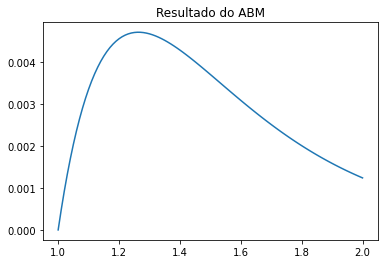

In [59]:
# Configuração inicial
t0 = 1.
tf = 2.
x0 = 0.
h = 0.01

# Integrando com o preditor-corretor
t_arr, x_arr = preditor_corretor(eq, rk4, t0, tf, x0, h)

# Plot simples
plt.plot(t_arr, x_arr)
plt.title('Resultado do ABM')

Abaixo, o RK4 é aplicado novamente ao problema, para comparar os resultados entre RK4 e ABM.

Text(0.5, 1.0, 'Resultado do RK4')

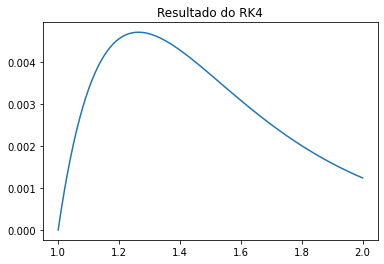

In [60]:
# Integrando com o RK4 para as mesmas condições
t_arr, x_arr_rk4 = rk.integrador(eq, rk.rk4, t0, tf, x0, h)

# Criando dataframe
df = pd.DataFrame({'t' : t_arr, 'Preditor-Corretor' : x_arr, 'RK4' : x_arr_rk4})

# Plot simples
plt.plot(t_arr, x_arr)
plt.title('Resultado do RK4')

A comparação de resultados é feita a seguir, de maneira gráfica. Nota-se que as curvas geradas pelos dois integradores se sobrepõem, o que valida o integrador numérico pelas fórmumas de ABM.

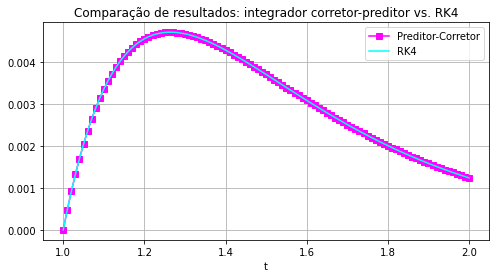

In [61]:
# Plotando a comparação
plt.figure(figsize = (8, 4))
plt.plot(t_arr, df['Preditor-Corretor'], marker = 's', color = 'magenta')
plt.plot(t_arr, df['RK4'], linestyle = '-', color = 'cyan')
plt.grid()
plt.title('Comparação de resultados: integrador corretor-preditor vs. RK4')
plt.xlabel('t')
plt.legend(['Preditor-Corretor', 'RK4'])

Como foi feito com o RK, abaixo uma classe é criada para que o integrador numérico de ABM possa ser utilizado mais facilmente.

In [62]:
class AdamsBashforthMoulton(RungeKutta):
    '''
    Classe que realiza a integração pelo método preditor-corretor de 
    Adams-Bashforth-Moulton.
    '''
    
    def inicializar(self, eq, metodo, t0, x0, h):
        '''
        Função que usa o RK4 para calcular os 4 primeiros pontos da 
        equação diferencial. Serve ao método de Adams-Bashforth-Mouton.
        ---
        Entradas:
            eq = função da equação diferencial
            metodo = integrador numérico (tipo de passo, usar RK4)
            t0 = tempo inicial
            x0 = estado inicial
            h = passo de integração
        Retorna:
            t_arr = array com os 4 primeiros tempos
            x_arr = array com os 4 primeiros estados
        '''
        t_arr, x_arr = self.integrador(eq = eq, 
                                  metodo = self.rk4, 
                                  t0 = t0, 
                                  tf = t0 + 3*h, 
                                  x0 = x0, 
                                  h = h) # execução com o RK4
        # Armazernar resultados iniciais na classe
        #self.t_arr = t_arr
        #self.x_arr = x_arr
        return t_arr, x_arr
    
    def preditor(self, eq, T, X, F, h):
        '''
        Função para pever o próximo estado.
        ---
        Entradas:
            eq = função da equação diferencial
            metodo = integrador numérico (tipo de passo, usar RK4)
            t0 = tempo inicial
            x0 = estado inicial
            h = passo de integração
        Retorna:
            xp = estado previsto
        '''
        n = 3
        
        # Previsão
        xp = X[n] + (h/24)*(55*F[n] - 59*F[n - 1] + 37*F[n - 2] - 9*F[n - 3])
         
        return xp

    def corretor(self, eq, T, X, F, h, xp):
        '''
        Função para pever o próximo estado.
        ---
        Entradas:
            eq = função da equação diferencial
            metodo = integrador numérico (tipo de passo, usar RK4)
            t0 = tempo inicial
            x0 = estado inicial
            h = passo de integração
            xp = estado previsto
        Retorna:
            xc = estado corrigido
        '''
        n = 3
        t_prox = T[n] + h
        
        # Calcular o próximo valor da equação diferencial
        f4 = eq(t_prox, xp)
        
        # Corrigir
        xc = X[n] + (h/24)*(9*f4 + 19*F[n] - 5*F[n - 1]+ F[n - 2])
        
        return xc, f4
    
    def configurar_iteracao(self, t_arr, x_arr, f_arr, n):
        '''
        Função para configurar iteração para a predição-correção.
        ---
        Entrada:
            t_arr = array de tempo
            x_arr = array de estados
            n = passo atual
        '''
        # Preparar vetores para predição e correção
        T = t_arr[n - 4:n]
        X = x_arr[n - 4:n]
        F = f_arr[n - 4:n]

        return T, X, F
    
    def preditor_corretor(self, eq, metodo, t0, tf, x0, h):

        # Criar listas de armazenamento
        x_arr = [] # estado
        t_arr = [] # tempo

        # Inicialização
        t_arr, x_arr = self.inicializar(eq, metodo, t0, x0, h)

        # Iniciar valores das equações diferenciais
        
        f3 = eq(t_arr[3], x_arr[3])
        f2 = eq(t_arr[2], x_arr[2])
        f1 = eq(t_arr[1], x_arr[1])
        f0 = eq(t_arr[0], x_arr[0])
        
        f_arr = [f0, f1, f2, f3]
            
        # Definir iterador e tempo inicial
        n = 4 # estamos no 4o passo de integração
        t = t0 + 3*h # aqui é o quinto tempo de integração

        while t < tf:     

            # Configurar iteração
            T, X, F = self.configurar_iteracao(t_arr, x_arr, f_arr, n)

            # Cálculo do estado previsto
            xp = self.preditor(eq, T, X, F, h)

            # Cálculo do estado corrigido
            xc, f_prox = self.corretor(eq, T, X, F, h, xp)
          
            # Atualizar passo atual e tempo atual
            n += 1
            t += h

            # Atualizar vetores de resultados
            t_arr.append(t)
            x_arr.append(xc)
            f_arr.append(f_prox)

        return t_arr, x_arr    

## Problema 4

Considere a seguinte EDO de Segunda ordem:

\begin{equation}
\ddot{r} = - \mu \frac{r}{r^3}
\end{equation}

em que 3,986e5 $km^3/s^2$ é a constante geogravitacional, e **r** = [x, y] é o vetor posição. As condições iniciais de posição e velocidade para o instante $t_0 = 0$ segundos, são 

$x_0$ = 7000 $km$, $\dot{x}_0$ = 0 $km/s$,

$y_0$ = 0 $km$ e $\dot{y}_0$ = 7,546049108166282 $km/s$.

Obtenha os resultados usando os métodos de RK4 e ABM de ordem 4, para o intervalo $t$ = [0 $T$] segundos, em que $T=$  5828,519867788797 $s$ é o período desta trajetória, e compare com a solução analítica exata, na forma da tabela abaixo.
Descreva claramente qual o passo de integração utilizado e a razão dessa escolha.

| t (s) | Solução Exata x (km) | Solução Exata y(km) | RK4 x (km) | RK4 y (km) | ABM x (km) | ABM y (km) |
|:-----:|:--------------------:|:-------------------:|:----------:|:----------:|:----------:|:----------:|
| 1,00  |      0,00000000      |                     |            |            |            |            |
|  ...  |          ...         |         ...         |     ...    |     ...    |     ...    |     ...    |
|   T   |           ?          |          ?          |      ?     |      ?     |      ?     |      ?     |

-----

Este problema será dividido em duas partes. A primeira, numérica, e a segunda, analítica. Para trabalhar com a parte numérica do problema, uma função da dinâmica do problema deve ser criada. Isso é feito a seguir.

In [63]:
def movimento_kepleriano(t, x, mu = 3.986e5):
    '''
    Esta função calcula os diferenciais para integração numérica do problema 
    de dois corpos, num movimento kepleriano.
    ---
    Entradas:
        x = array de estado [x, y, z, dxdt, dydt, dzdt] (zerar os termos z para problema plano)
        mu = parâmetro gravitacional. O padrão é o da Terra.
    Saídas:
        drdt = array de diferencial de estado
    '''
    
    # Obter posições
    r = x[:2]
    
    # Obter derivadas de posição (velocidades) a partir do vetor de estado
    drdt = x[2:]
    
    # Obter as acelerações do problema de 2 corpos
    dvdt = -mu*r/(np.linalg.norm(r)**3)
    
    # Montar vetor diferencial de estado
    dxdt = np.array([drdt, dvdt]).reshape(-1, )
    
    return  dxdt

Integrar o movimento kepleriano por um período $T$ = 5828,519867788797 $s$ gera uma órbita fechada, desde que um passo de integração adequado seja utilizado. As células a seguir realizam a integração:

In [64]:
# Esta célula executa o RK4 para este problema
rk = RungeKutta()
t_rk, x_rk = rk.integrador(eq = movimento_kepleriano,
                           metodo = rk.rk4,
                           t0 = 0.,
                           tf = 5828.519867788797,
                           x0 = np.array([7000, 0., 0., 7.546049108166282]),
                           h = 0.1)

In [77]:
# Esta célula executa o ABM para este problema
ABM = AdamsBashforthMoulton()
t_abm, x_abm = ABM.preditor_corretor(eq = movimento_kepleriano,
                           metodo = rk.rk4,
                           t0 = 0.,
                           tf = 5828.519867788797,
                           x0 = np.array([7000, 0., 0., 7.546049108166282]),
                           h = 0.1)

Curtis (2020) tem orientações de como encontrar a órbita teórica.

Partindo da equação da vis-viva:

\begin{equation}
\begin{split}
v^2 = \mu \left( \frac{2}{r} - \frac{1}{a} \right), \\
\rightarrow a = \frac{\mu r}{2 \mu - r v^2}
\end{split}
\end{equation}

em que $a$ é o semieixo maior, $\mu$ o parâmetro gravitacional, $r$ a magnitude da posição e $v$ a magnitude da velocidade. 

Calculando, é obtido o seguinte: 

In [30]:
mu = 3.986e5 # km^3/s^2 - parâmetro gravitacional
r = np.sqrt(7000.**2 + 0.**2) # km - magnitude da posição inicial
v = np.sqrt(0.**2 + 7.546049108166282**2) # km/s - magnitude da velocidade inicial
a = mu*r/(2*mu - r*v**2) # km - semieixo maior
print(a, 'km')

7000.0 km


O semieixo maior calculado é igual à posição inicial. Isso só é possível se a órbita for circular. Assim, calcular a anomalia média ao longo de todo o período é suficiente para se determinar os pontos valores da órbita teórica. A equação da anomalia média $M$ é:

\begin{equation}
M = n t
\end{equation}

em que $n$ é o movimento médio e $t$ o tempo. O valor do movimento médio é determinado por $n = (\mu/a^3)^{1/2}$. Assim:


In [31]:
n = (mu/a**3)**(1/2) # rad/s - movimento médio
print(n, 'rad/s')

0.001078007015452326 rad/s


Com essas informações, a órbita da solução analítica pode ser plotada.

In [32]:
def det_xy_de_M_orbita_circular(t, n, a):
    '''
    Função para calcular uma órbita a partir da anomalia média.
    ---
    Entradas:
        t = tempo
        n = anomalia média
        a = semieixo maior
    Retorna:
        x = posição x
        y = posição y
    '''
    M = n*t
    x =  a*np.cos(M)
    y = a*np.sin(M)
    return x, y

# Calcular órbita teórica
res = []
T = []
for t in np.arange(0., 5828.519867788797 + 0.1, 0.1):
    x, y = det_xy_de_M_orbita_circular(t, n, a)
    res.append([x, y])
    T.append(t)

Abaixo, uma função para plotar a órbita 2d foi escrita, para simplificar a geração de gráficos.

In [33]:
def plotar_orbita_2d(T, X, titulo = '', **kwargs):
    '''
    Esta função plota uma órbita 2D.
    ---
    Entradas:
        T = vetor de tempo
        X = vetor de estados
        titulo = [opc] título do gráfico.
        **kwargs = argumentos possíveis para o gráfico
    '''
    x = np.array(X)[:, 0]
    y = np.array(X)[:, 1]
    plt.plot(x, y, **kwargs)
    plt.plot(x[0], y[0], marker = 'o')
    plt.xlabel('x [km]')
    plt.ylabel('y [km]')
    plt.title('Órbita 2D: ' + titulo)

Plotando as órbitas calculadas com o RK4 e com o ABM, sobrepostas, o gráfico seguinte é obtido.

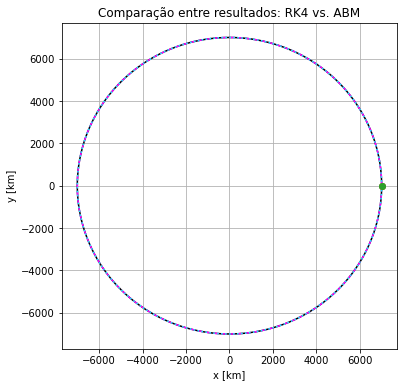

In [34]:
plt.figure(figsize = (6, 6))
plotar_orbita_2d(t_rk, x_rk, linestyle = '-', color = 'black')
plotar_orbita_2d(t_abm, x_abm, linestyle = '--', color = 'magenta')
plotar_orbita_2d(T, res, linestyle = ':', color = 'cyan')
plt.title('Comparação entre resultados: RK4 vs. ABM')
plt.grid()

O gráfico acima mostra que as 3 órbitas (RK4, ABM e teórica), para um passo de 0.1, se sobrepõem. Abaixo, um dataframe é criado para que esses valores sejam melhor comparados.

In [35]:
df = pd.DataFrame({'t' : t_rk, 
                   'X Teórico [km]' : np.array(res)[:, 0],
                   'Y Teórico [km]' : np.array(res)[:, 1],
                   'X RK4 [km]' : np.array(x_rk)[:, 0],
                   'Y RK4 [km]' : np.array(x_rk)[:, 1],
                   'X ABM [km]' : np.array(x_abm)[:, 0],
                   'Y ABM [km]' : np.array(x_abm)[:, 1],
                  })

Uma amostra aleatória, do dataframe, com 10 linhas de dados é extraída a seguir.

In [36]:
df.sample(10)

,t,X Teórico [km],Y Teórico [km],X RK4 [km],Y RK4 [km],X ABM [km],Y ABM [km]
26499,2649.9,-6717.667262,1967.980323,-6717.667262,1967.980323,-6717.667262,1967.980323
30892,3089.2,-6875.891287,-1312.295322,-6875.891287,-1312.295322,-6875.891287,-1312.295322
28030,2803.0,-6949.711564,837.561446,-6949.711564,837.561446,-6949.711564,837.561446
41966,4196.6,-1311.182241,-6876.103630,-1311.182241,-6876.103630,-1311.182241,-6876.103630
18017,1801.7,-2540.761392,6522.616925,-2540.761392,6522.616925,-2540.761392,6522.616925
37963,3796.3,-4066.966660,-5697.348698,-4066.966660,-5697.348698,-4066.966660,-5697.348698
42431,4243.1,-964.998891,-6933.165016,-964.998891,-6933.165016,-964.998891,-6933.165016
15230,1523.0,-496.640899,6982.359760,-496.640899,6982.359760,-496.640899,6982.359760
52428,5242.8,5650.371556,-4131.985150,5650.371556,-4131.985150,5650.371556,-4131.985150
20352,2035.2,-4085.248963,5684.253769,-4085.248963,5684.253769,-4085.248963,5684.253769


Graficamente:

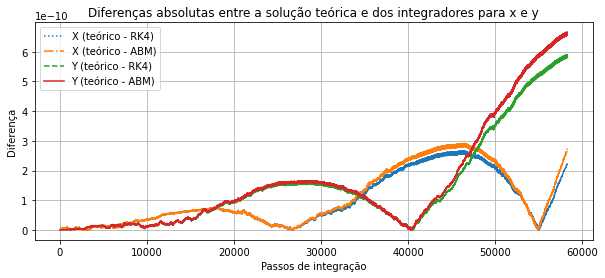

In [37]:
plt.figure(figsize = (10, 4))
abs(df['X Teórico [km]'] - df['X RK4 [km]']).plot(linestyle = ':')
abs(df['X Teórico [km]'] - df['X ABM [km]']).plot(linestyle = '-.')
abs(df['Y Teórico [km]'] - df['Y RK4 [km]']).plot(linestyle = '--')
abs(df['Y Teórico [km]'] - df['Y ABM [km]']).plot(linestyle = '-')
plt.grid()
plt.title('Diferenças absolutas entre a solução teórica e dos integradores para x e y')
plt.xlabel('Passos de integração')
plt.ylabel('Diferença')
plt.legend(['X (teórico - RK4)', 'X (teórico - ABM)', 'Y (teórico - RK4)', 'Y (teórico - ABM)'])

O gráfico acima mostra um comportamento similar tanto nas diferenças calculadas para $x$, quanto nas diferenças calculadas para $y$, com relação aos valores teóricos esperados, para os dois integradores. É notável que de maneira média as diferenças entre os valores numéricos e os teóricos oscilam. A ordem de grandeza é de 1e-10, o que é um valor intuitivamente pequeno. Entretanto, para longos períodos, a integração com passo de 0,1 poderia acumular erros significativos.

A seguir, o vários passos de integração serão utilizados para estudar o efeito sobre os resultados.

In [38]:
def gerar_rk4_abm_teoria_plotar(h):
    
    # Executar o RK4 para o passo h
    rk = RungeKutta()
    t_rk, x_rk = rk.integrador(eq = movimento_kepleriano,
                               metodo = rk.rk4,
                               t0 = 0.,
                               tf = 5828.519867788797,
                               x0 = np.array([7000, 0., 0., 7.546049108166282]),
                               h = h)
    
    # Executar o ABM para o passo h 
    ABM = AdamsBashforthMoulton()
    t_abm, x_abm = ABM.preditor_corretor(eq = movimento_kepleriano,
                               metodo = rk.rk4,
                               t0 = 0.,
                               tf = 5828.519867788797,
                               x0 = np.array([7000, 0., 0., 7.546049108166282]),
                               h = h)
    
    # Calcular órbita teórica para o passo h
    res = []
    T = []
    for t in np.arange(0., 5828.519867788797 + h, h):
        x, y = det_xy_de_M_orbita_circular(t, n, a)
        res.append([x, y])
        T.append(t)
    
    # Criar dataframes
    df = pd.DataFrame({'t' : t_rk, 
               'X Teórico [km]' : np.array(res)[:, 0],
               'Y Teórico [km]' : np.array(res)[:, 1],
               'X RK4 [km]' : np.array(x_rk)[:, 0],
               'Y RK4 [km]' : np.array(x_rk)[:, 1],
               'X ABM [km]' : np.array(x_abm)[:, 0],
               'Y ABM [km]' : np.array(x_abm)[:, 1],
              })
    
    # Plotar
    plt.figure(figsize = (10, 4))
    abs(df['X Teórico [km]'] - df['X RK4 [km]']).plot(linestyle = ':')
    abs(df['X Teórico [km]'] - df['X ABM [km]']).plot(linestyle = '-.')
    abs(df['Y Teórico [km]'] - df['Y RK4 [km]']).plot(linestyle = '--')
    abs(df['Y Teórico [km]'] - df['Y ABM [km]']).plot(linestyle = '-')
    plt.grid()
    plt.title('Diferenças absolutas: solução teórica vs. integradores para x e y (h = ' + str(h) + ')')
    plt.xlabel('Passos de integração')
    plt.ylabel('Diferença')
    plt.legend(['X (teórico - RK4)', 'X (teórico - ABM)', 'Y (teórico - RK4)', 'Y (teórico - ABM)'])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\luang\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-39-8d05ebe901da>", line 4, in <module>
    gerar_rk4_abm_teoria_plotar(h)
  File "<ipython-input-38-615f5800e33a>", line 35, in gerar_rk4_abm_teoria_plotar
    'X ABM [km]' : np.array(x_abm)[:, 0],
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\luang\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2045, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\luang\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1170, in get_records
    return _fixed_

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\luang\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-39-8d05ebe901da>", line 4, in <module>
    gerar_rk4_abm_teoria_plotar(h)
  File "<ipython-input-38-615f5800e33a>", line 35, in gerar_rk4_abm_teoria_plotar
    'X ABM [km]' : np.array(x_abm)[:, 0],
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\luang\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2045, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\luang\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
    if 

TypeError: object of type 'NoneType' has no len()

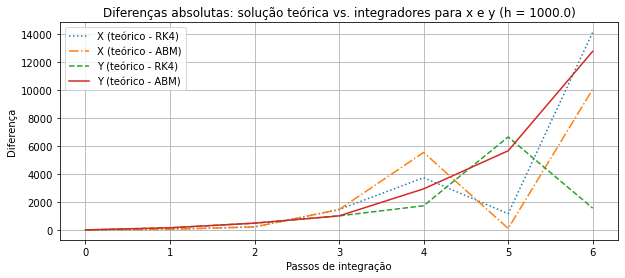

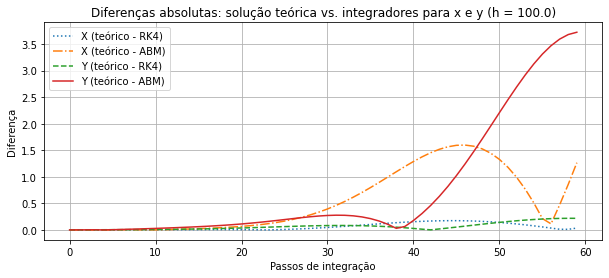

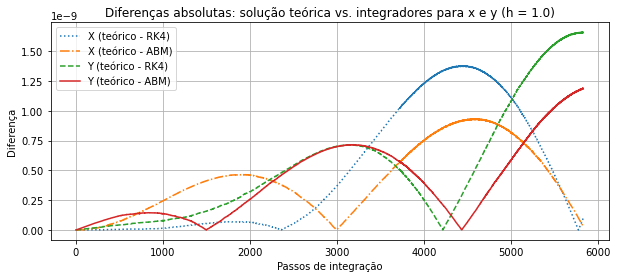

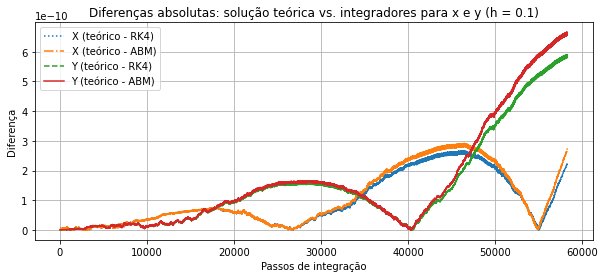

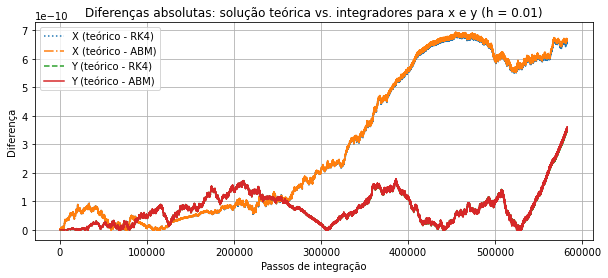

In [38]:
# Gerar vários gráficos com diferentes passos de integração
h_lista = [1000., 100., 1., 0.1, 0.01, 0.001]
for h in h_lista:
    gerar_rk4_abm_teoria_plotar(h)

Os gráficos acima dão a noção de como a variação do passo de integração, de um passo maior para um passo menor, afeta os resultados. Os efeitos são analisados a seguir.

* O passo de 1.000 $s$ gera erros da ordem 14.000 $km$, o que faz com que os resultados não façam sentido, tanto para o ABM quanto para o RK4. 
* O passo de 100 $s$ reduz os erros para a ordem de 1,4 $km$. É notado um comportamento oscilatórios com amplitudes crescentes para os erros tanto do ABM quanto do RK4. 
* O passo de 1 $s$ produz erros da ordem de 1e-9 $km$, o que é uma melhoria significativa com relação ao passo anterior. O comportamento oscilatório notado anteriormente ainda é presente, mas os resultados tanto para o ABM quanto para o RK4 estão mais próximos um do outro. Isto é, os resultados para $X$ do ABM estão mais próximos dos de $X$ do RK4. O mesmo pode ser dito dos resultados de $Y$.
* O passo de 0,1 $s$ produz erros da ordem de 1e-10 $km$. O mesmo comportamento do passo anterior é notado.
* O passo de 0,01 $s$ produz erros da ordem de 1e-10 $km$, mas já não é mais claro o comportamento oscilatório. Os erros de $X$ e $Y$ para os dois integradores estão ainda mais próximos um do outro.
* O passo de 0,001 $s$ produz erros da ordem de 1e-8 e o comportamento oscilatório volta a ser notado. Isso desafia a intuição: reduzir o passo de integração para 0,001 $s$ piora os resultados se comparados com os passos de integração de 0,1 e de 0,01 $s$. 

Com base nessa análise, um passo de integração adequado encontrado para a propagação da órbita é 0,1 $s$.

## Referências

KUGA, H. Notas de Aula da Disciplina Satélites Artificiais -  Movimento Orbital. Capítulo 6 - Métodos de Integração de Órbita. Instituto Nacional de Pesquisas Espaciais. 2021.

FRANCO, N. Cálculo Numérico. Pearson Universidades. 1 ed. 2006.

HOFFMAN, J. Numerical Methods for Engineers and Scientists. Purdue University. 1 ed. 1992.

CURTIS, H. Orbital Mechanics for Engineering Students. Elsevier. 4 ed. 2020.

BUTCHER, J. A history of Runge-Kutta methods. Applied Numerical Mathematics, New Zealand. 1996. 